In [24]:
import numpy as np
import pandas as pd
import graphviz
import graphviz.backend
from numpy.distutils.system_info import f2py_info
from sklearn import tree
from sklearn.datasets import load_boston, load_iris, load_wine, load_digits, load_breast_cancer, load_diabetes, fetch_mldata
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib.figure import figaspect
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from dtreeviz.shadow import *
from numbers import Number
import matplotlib.patches as patches
from scipy import stats
from sklearn.neighbors import KernelDensity
import inspect, sys, tempfile

from dtreeviz.trees import *

## Classification - Breast cancer dataset

In [25]:
cancer = load_breast_cancer()
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension           ...             worst radius  \
0                 0.07871           ...                    25.38   
1                 0.05667           ...                    24.99   
2                 0.05999           ...                    23.57   
3                 0.09744           ...                    14.91   
4                 0.05883           ...                    22.54   

   worst texture  worst perimeter  worst area  worst smoothness  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 30 columns]

Creating the feature and target vector space:

In [26]:
X = df
Y = cancer.target

Splitting the data into training and testing data:

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .1, random_state = 42)

Performing Gridserach on parameters:

In [28]:
parameters={'min_samples_split' : np.arange(2, 200, 5),'max_depth': np.arange(1,40,2),
            'min_samples_leaf': np.arange(2, 200, 5), 'criterion' : list(['gini', 'entropy'])
            }

In [29]:
clf = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(clf, parameters, cv = 5, scoring="accuracy")

In [30]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': array([  2,   7,  12,  17,  22,  27,  32,  37,  42,  47,  52,  57,  62,
        67,  72,  77,  82,  87,  92,  97, 102, 107, 112, 117, 122, 127,
       132, 137, 142, 147, 152, 157, 162, 167, 172, 177, 182, 187, 192,
       197]), 'max_depth': array([ 1,  3,  5,  7,  ...2, 147, 152, 157, 162, 167, 172, 177, 182, 187, 192,
       197]), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [31]:
print("The best score of the decision tree is: ", grid_search.best_score_)
print("The best parameters of the decision tree are: ", grid_search.best_params_)
print("\nGrid scores on development set:\n")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

The best score of the decision tree is:  0.939453125
The best parameters of the decision tree are:  {'criterion': 'gini', 'max_depth': 29, 'min_samples_leaf': 2, 'min_samples_split': 7}

Grid scores on development set:

0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 7}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 12}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 17}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 22}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 27}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 32}
0.875 (+/-0.072) for {'criterion'

0.877 (+/-0.076) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 37, 'min_samples_split': 52}
0.877 (+/-0.076) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 37, 'min_samples_split': 57}
0.877 (+/-0.076) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 37, 'min_samples_split': 62}
0.877 (+/-0.076) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 37, 'min_samples_split': 67}
0.877 (+/-0.076) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 37, 'min_samples_split': 72}
0.877 (+/-0.076) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 37, 'min_samples_split': 77}
0.877 (+/-0.076) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 37, 'min_samples_split': 82}
0.877 (+/-0.076) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 37, 'min_samples_split': 87}
0.877 (+/-0.076) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 37, 'min_samples_split': 92}
0.877 (+/-0.076) for {'crite

0.898 (+/-0.080) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 27, 'min_samples_split': 42}
0.898 (+/-0.080) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 27, 'min_samples_split': 47}
0.898 (+/-0.080) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 27, 'min_samples_split': 52}
0.898 (+/-0.080) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 27, 'min_samples_split': 57}
0.898 (+/-0.080) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 27, 'min_samples_split': 62}
0.898 (+/-0.080) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 27, 'min_samples_split': 67}
0.898 (+/-0.080) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 27, 'min_samples_split': 72}
0.898 (+/-0.080) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 27, 'min_samples_split': 77}
0.898 (+/-0.080) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 27, 'min_samples_split': 82}
0.898 (+/-0.080) for {'crite

0.908 (+/-0.080) for {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 167}
0.908 (+/-0.080) for {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 172}
0.908 (+/-0.080) for {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 177}
0.908 (+/-0.080) for {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 182}
0.904 (+/-0.073) for {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 187}
0.908 (+/-0.080) for {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 192}
0.908 (+/-0.080) for {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 197}
0.926 (+/-0.051) for {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 7, 'min_samples_split': 2}
0.918 (+/-0.046) for {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 7, 'min_samples_split': 7}
0.924 (+/-0.055) for {'criterion

0.879 (+/-0.073) for {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 137, 'min_samples_split': 142}
0.879 (+/-0.073) for {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 137, 'min_samples_split': 147}
0.879 (+/-0.073) for {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 137, 'min_samples_split': 152}
0.879 (+/-0.073) for {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 137, 'min_samples_split': 157}
0.879 (+/-0.073) for {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 137, 'min_samples_split': 162}
0.879 (+/-0.073) for {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 137, 'min_samples_split': 167}
0.879 (+/-0.073) for {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 137, 'min_samples_split': 172}
0.879 (+/-0.073) for {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 137, 'min_samples_split': 177}
0.879 (+/-0.073) for {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 137, 'min_samples_split': 182}
0.879 (+/-

0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 82, 'min_samples_split': 42}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 82, 'min_samples_split': 47}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 82, 'min_samples_split': 52}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 82, 'min_samples_split': 57}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 82, 'min_samples_split': 62}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 82, 'min_samples_split': 67}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 82, 'min_samples_split': 72}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 82, 'min_samples_split': 77}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 82, 'min_samples_split': 82}
0.875 (+/-0.072) for {'crite

0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 132, 'min_samples_split': 17}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 132, 'min_samples_split': 22}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 132, 'min_samples_split': 27}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 132, 'min_samples_split': 32}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 132, 'min_samples_split': 37}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 132, 'min_samples_split': 42}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 132, 'min_samples_split': 47}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 132, 'min_samples_split': 52}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 132, 'min_samples_split': 57}
0.875 (+/-

0.893 (+/-0.033) for {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 187, 'min_samples_split': 157}
0.893 (+/-0.033) for {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 187, 'min_samples_split': 162}
0.893 (+/-0.033) for {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 187, 'min_samples_split': 167}
0.893 (+/-0.033) for {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 187, 'min_samples_split': 172}
0.893 (+/-0.033) for {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 187, 'min_samples_split': 177}
0.893 (+/-0.033) for {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 187, 'min_samples_split': 182}
0.893 (+/-0.033) for {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 187, 'min_samples_split': 187}
0.893 (+/-0.033) for {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 187, 'min_samples_split': 192}
0.893 (+/-0.033) for {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 187, 'min_samples_split': 197}
0

0.885 (+/-0.073) for {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 147, 'min_samples_split': 27}
0.885 (+/-0.073) for {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 147, 'min_samples_split': 32}
0.885 (+/-0.073) for {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 147, 'min_samples_split': 37}
0.885 (+/-0.073) for {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 147, 'min_samples_split': 42}
0.885 (+/-0.073) for {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 147, 'min_samples_split': 47}
0.885 (+/-0.073) for {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 147, 'min_samples_split': 52}
0.885 (+/-0.073) for {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 147, 'min_samples_split': 57}
0.885 (+/-0.073) for {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 147, 'min_samples_split': 62}
0.885 (+/-0.073) for {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 147, 'min_samples_split': 67}
0.885 (+/-

0.889 (+/-0.070) for {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 162, 'min_samples_split': 117}
0.889 (+/-0.070) for {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 162, 'min_samples_split': 122}
0.889 (+/-0.070) for {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 162, 'min_samples_split': 127}
0.889 (+/-0.070) for {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 162, 'min_samples_split': 132}
0.889 (+/-0.070) for {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 162, 'min_samples_split': 137}
0.889 (+/-0.070) for {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 162, 'min_samples_split': 142}
0.889 (+/-0.070) for {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 162, 'min_samples_split': 147}
0.889 (+/-0.070) for {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 162, 'min_samples_split': 152}
0.889 (+/-0.070) for {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 162, 'min_samples_split': 157}
0

0.920 (+/-0.052) for {'criterion': 'gini', 'max_depth': 21, 'min_samples_leaf': 12, 'min_samples_split': 77}
0.920 (+/-0.052) for {'criterion': 'gini', 'max_depth': 21, 'min_samples_leaf': 12, 'min_samples_split': 82}
0.916 (+/-0.044) for {'criterion': 'gini', 'max_depth': 21, 'min_samples_leaf': 12, 'min_samples_split': 87}
0.916 (+/-0.044) for {'criterion': 'gini', 'max_depth': 21, 'min_samples_leaf': 12, 'min_samples_split': 92}
0.920 (+/-0.052) for {'criterion': 'gini', 'max_depth': 21, 'min_samples_leaf': 12, 'min_samples_split': 97}
0.916 (+/-0.044) for {'criterion': 'gini', 'max_depth': 21, 'min_samples_leaf': 12, 'min_samples_split': 102}
0.920 (+/-0.052) for {'criterion': 'gini', 'max_depth': 21, 'min_samples_leaf': 12, 'min_samples_split': 107}
0.920 (+/-0.052) for {'criterion': 'gini', 'max_depth': 21, 'min_samples_leaf': 12, 'min_samples_split': 112}
0.916 (+/-0.044) for {'criterion': 'gini', 'max_depth': 21, 'min_samples_leaf': 12, 'min_samples_split': 117}
0.920 (+/-0.052

0.893 (+/-0.033) for {'criterion': 'gini', 'max_depth': 21, 'min_samples_leaf': 187, 'min_samples_split': 27}
0.893 (+/-0.033) for {'criterion': 'gini', 'max_depth': 21, 'min_samples_leaf': 187, 'min_samples_split': 32}
0.893 (+/-0.033) for {'criterion': 'gini', 'max_depth': 21, 'min_samples_leaf': 187, 'min_samples_split': 37}
0.893 (+/-0.033) for {'criterion': 'gini', 'max_depth': 21, 'min_samples_leaf': 187, 'min_samples_split': 42}
0.893 (+/-0.033) for {'criterion': 'gini', 'max_depth': 21, 'min_samples_leaf': 187, 'min_samples_split': 47}
0.893 (+/-0.033) for {'criterion': 'gini', 'max_depth': 21, 'min_samples_leaf': 187, 'min_samples_split': 52}
0.893 (+/-0.033) for {'criterion': 'gini', 'max_depth': 21, 'min_samples_leaf': 187, 'min_samples_split': 57}
0.893 (+/-0.033) for {'criterion': 'gini', 'max_depth': 21, 'min_samples_leaf': 187, 'min_samples_split': 62}
0.893 (+/-0.033) for {'criterion': 'gini', 'max_depth': 21, 'min_samples_leaf': 187, 'min_samples_split': 67}
0.893 (+/-

0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 62, 'min_samples_split': 142}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 62, 'min_samples_split': 147}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 62, 'min_samples_split': 152}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 62, 'min_samples_split': 157}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 62, 'min_samples_split': 162}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 62, 'min_samples_split': 167}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 62, 'min_samples_split': 172}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 62, 'min_samples_split': 177}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 62, 'min_samples_split': 182}
0.875 (+/-

0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 27, 'min_samples_leaf': 77, 'min_samples_split': 67}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 27, 'min_samples_leaf': 77, 'min_samples_split': 72}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 27, 'min_samples_leaf': 77, 'min_samples_split': 77}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 27, 'min_samples_leaf': 77, 'min_samples_split': 82}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 27, 'min_samples_leaf': 77, 'min_samples_split': 87}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 27, 'min_samples_leaf': 77, 'min_samples_split': 92}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 27, 'min_samples_leaf': 77, 'min_samples_split': 97}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 27, 'min_samples_leaf': 77, 'min_samples_split': 102}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 27, 'min_samples_leaf': 77, 'min_samples_split': 107}
0.875 (+/-0.072) 

0.898 (+/-0.080) for {'criterion': 'gini', 'max_depth': 29, 'min_samples_leaf': 27, 'min_samples_split': 137}
0.898 (+/-0.080) for {'criterion': 'gini', 'max_depth': 29, 'min_samples_leaf': 27, 'min_samples_split': 142}
0.898 (+/-0.080) for {'criterion': 'gini', 'max_depth': 29, 'min_samples_leaf': 27, 'min_samples_split': 147}
0.898 (+/-0.080) for {'criterion': 'gini', 'max_depth': 29, 'min_samples_leaf': 27, 'min_samples_split': 152}
0.898 (+/-0.080) for {'criterion': 'gini', 'max_depth': 29, 'min_samples_leaf': 27, 'min_samples_split': 157}
0.898 (+/-0.080) for {'criterion': 'gini', 'max_depth': 29, 'min_samples_leaf': 27, 'min_samples_split': 162}
0.898 (+/-0.080) for {'criterion': 'gini', 'max_depth': 29, 'min_samples_leaf': 27, 'min_samples_split': 167}
0.898 (+/-0.080) for {'criterion': 'gini', 'max_depth': 29, 'min_samples_leaf': 27, 'min_samples_split': 172}
0.898 (+/-0.080) for {'criterion': 'gini', 'max_depth': 29, 'min_samples_leaf': 27, 'min_samples_split': 177}
0.898 (+/-

0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 31, 'min_samples_leaf': 47, 'min_samples_split': 162}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 31, 'min_samples_leaf': 47, 'min_samples_split': 167}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 31, 'min_samples_leaf': 47, 'min_samples_split': 172}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 31, 'min_samples_leaf': 47, 'min_samples_split': 177}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 31, 'min_samples_leaf': 47, 'min_samples_split': 182}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 31, 'min_samples_leaf': 47, 'min_samples_split': 187}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 31, 'min_samples_leaf': 47, 'min_samples_split': 192}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 31, 'min_samples_leaf': 47, 'min_samples_split': 197}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 31, 'min_samples_leaf': 52, 'min_samples_split': 2}
0.875 (+/-0.

0.885 (+/-0.073) for {'criterion': 'gini', 'max_depth': 33, 'min_samples_leaf': 147, 'min_samples_split': 2}
0.885 (+/-0.073) for {'criterion': 'gini', 'max_depth': 33, 'min_samples_leaf': 147, 'min_samples_split': 7}
0.885 (+/-0.073) for {'criterion': 'gini', 'max_depth': 33, 'min_samples_leaf': 147, 'min_samples_split': 12}
0.885 (+/-0.073) for {'criterion': 'gini', 'max_depth': 33, 'min_samples_leaf': 147, 'min_samples_split': 17}
0.885 (+/-0.073) for {'criterion': 'gini', 'max_depth': 33, 'min_samples_leaf': 147, 'min_samples_split': 22}
0.885 (+/-0.073) for {'criterion': 'gini', 'max_depth': 33, 'min_samples_leaf': 147, 'min_samples_split': 27}
0.885 (+/-0.073) for {'criterion': 'gini', 'max_depth': 33, 'min_samples_leaf': 147, 'min_samples_split': 32}
0.885 (+/-0.073) for {'criterion': 'gini', 'max_depth': 33, 'min_samples_leaf': 147, 'min_samples_split': 37}
0.885 (+/-0.073) for {'criterion': 'gini', 'max_depth': 33, 'min_samples_leaf': 147, 'min_samples_split': 42}
0.885 (+/-0.

0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 35, 'min_samples_leaf': 82, 'min_samples_split': 82}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 35, 'min_samples_leaf': 82, 'min_samples_split': 87}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 35, 'min_samples_leaf': 82, 'min_samples_split': 92}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 35, 'min_samples_leaf': 82, 'min_samples_split': 97}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 35, 'min_samples_leaf': 82, 'min_samples_split': 102}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 35, 'min_samples_leaf': 82, 'min_samples_split': 107}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 35, 'min_samples_leaf': 82, 'min_samples_split': 112}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 35, 'min_samples_leaf': 82, 'min_samples_split': 117}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 35, 'min_samples_leaf': 82, 'min_samples_split': 122}
0.875 (+/-0.07

0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 37, 'min_samples_leaf': 82, 'min_samples_split': 22}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 37, 'min_samples_leaf': 82, 'min_samples_split': 27}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 37, 'min_samples_leaf': 82, 'min_samples_split': 32}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 37, 'min_samples_leaf': 82, 'min_samples_split': 37}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 37, 'min_samples_leaf': 82, 'min_samples_split': 42}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 37, 'min_samples_leaf': 82, 'min_samples_split': 47}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 37, 'min_samples_leaf': 82, 'min_samples_split': 52}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 37, 'min_samples_leaf': 82, 'min_samples_split': 57}
0.875 (+/-0.072) for {'criterion': 'gini', 'max_depth': 37, 'min_samples_leaf': 82, 'min_samples_split': 62}
0.875 (+/-0.072) fo

0.914 (+/-0.044) for {'criterion': 'gini', 'max_depth': 39, 'min_samples_leaf': 7, 'min_samples_split': 162}
0.906 (+/-0.074) for {'criterion': 'gini', 'max_depth': 39, 'min_samples_leaf': 7, 'min_samples_split': 167}
0.906 (+/-0.074) for {'criterion': 'gini', 'max_depth': 39, 'min_samples_leaf': 7, 'min_samples_split': 172}
0.910 (+/-0.081) for {'criterion': 'gini', 'max_depth': 39, 'min_samples_leaf': 7, 'min_samples_split': 177}
0.910 (+/-0.081) for {'criterion': 'gini', 'max_depth': 39, 'min_samples_leaf': 7, 'min_samples_split': 182}
0.906 (+/-0.074) for {'criterion': 'gini', 'max_depth': 39, 'min_samples_leaf': 7, 'min_samples_split': 187}
0.906 (+/-0.074) for {'criterion': 'gini', 'max_depth': 39, 'min_samples_leaf': 7, 'min_samples_split': 192}
0.906 (+/-0.074) for {'criterion': 'gini', 'max_depth': 39, 'min_samples_leaf': 7, 'min_samples_split': 197}
0.910 (+/-0.042) for {'criterion': 'gini', 'max_depth': 39, 'min_samples_leaf': 12, 'min_samples_split': 2}
0.906 (+/-0.037) for

0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 22, 'min_samples_split': 57}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 22, 'min_samples_split': 62}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 22, 'min_samples_split': 67}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 22, 'min_samples_split': 72}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 22, 'min_samples_split': 77}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 22, 'min_samples_split': 82}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 22, 'min_samples_split': 87}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 22, 'min_samples_split': 92}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 22, 'min_samples_split': 97}
0

0.887 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 152, 'min_samples_split': 172}
0.887 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 152, 'min_samples_split': 177}
0.887 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 152, 'min_samples_split': 182}
0.887 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 152, 'min_samples_split': 187}
0.887 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 152, 'min_samples_split': 192}
0.887 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 152, 'min_samples_split': 197}
0.891 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 157, 'min_samples_split': 2}
0.891 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 157, 'min_samples_split': 7}
0.891 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 157, 'min_samples_

0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 92, 'min_samples_split': 162}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 92, 'min_samples_split': 167}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 92, 'min_samples_split': 172}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 92, 'min_samples_split': 177}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 92, 'min_samples_split': 182}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 92, 'min_samples_split': 187}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 92, 'min_samples_split': 192}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 92, 'min_samples_split': 197}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 97, 'min_samples_split

0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 147}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 152}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 157}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 162}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 167}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 172}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 177}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 182}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split

0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 72, 'min_samples_split': 22}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 72, 'min_samples_split': 27}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 72, 'min_samples_split': 32}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 72, 'min_samples_split': 37}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 72, 'min_samples_split': 42}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 72, 'min_samples_split': 47}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 72, 'min_samples_split': 52}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 72, 'min_samples_split': 57}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 72, 'min_samples_split': 62}
0

0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 47, 'min_samples_split': 77}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 47, 'min_samples_split': 82}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 47, 'min_samples_split': 87}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 47, 'min_samples_split': 92}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 47, 'min_samples_split': 97}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 47, 'min_samples_split': 102}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 47, 'min_samples_split': 107}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 47, 'min_samples_split': 112}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 47, 'min_samples_split': 11

0.887 (+/-0.047) for {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 192, 'min_samples_split': 167}
0.885 (+/-0.053) for {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 192, 'min_samples_split': 172}
0.887 (+/-0.047) for {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 192, 'min_samples_split': 177}
0.883 (+/-0.044) for {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 192, 'min_samples_split': 182}
0.883 (+/-0.044) for {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 192, 'min_samples_split': 187}
0.883 (+/-0.044) for {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 192, 'min_samples_split': 192}
0.883 (+/-0.044) for {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 192, 'min_samples_split': 197}
0.873 (+/-0.037) for {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 197, 'min_samples_split': 2}
0.871 (+/-0.031) for {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 197, 'min_sample

0.887 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 147, 'min_samples_split': 102}
0.887 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 147, 'min_samples_split': 107}
0.887 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 147, 'min_samples_split': 112}
0.887 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 147, 'min_samples_split': 117}
0.887 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 147, 'min_samples_split': 122}
0.887 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 147, 'min_samples_split': 127}
0.887 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 147, 'min_samples_split': 132}
0.887 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 147, 'min_samples_split': 137}
0.887 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 147, 

0.889 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 142, 'min_samples_split': 112}
0.889 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 142, 'min_samples_split': 117}
0.889 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 142, 'min_samples_split': 122}
0.889 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 142, 'min_samples_split': 127}
0.889 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 142, 'min_samples_split': 132}
0.889 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 142, 'min_samples_split': 137}
0.889 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 142, 'min_samples_split': 142}
0.889 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 142, 'min_samples_split': 147}
0.889 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 142, 

0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 87, 'min_samples_split': 57}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 87, 'min_samples_split': 62}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 87, 'min_samples_split': 67}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 87, 'min_samples_split': 72}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 87, 'min_samples_split': 77}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 87, 'min_samples_split': 82}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 87, 'min_samples_split': 87}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 87, 'min_samples_split': 92}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 87, 'min_samples_spli

0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 47, 'min_samples_split': 12}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 47, 'min_samples_split': 17}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 47, 'min_samples_split': 22}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 47, 'min_samples_split': 27}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 47, 'min_samples_split': 32}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 47, 'min_samples_split': 37}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 47, 'min_samples_split': 42}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 47, 'min_samples_split': 47}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 47, 'min_samples_spli

0.891 (+/-0.019) for {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 177, 'min_samples_split': 172}
0.891 (+/-0.019) for {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 177, 'min_samples_split': 177}
0.891 (+/-0.019) for {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 177, 'min_samples_split': 182}
0.891 (+/-0.019) for {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 177, 'min_samples_split': 187}
0.891 (+/-0.019) for {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 177, 'min_samples_split': 192}
0.891 (+/-0.019) for {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 177, 'min_samples_split': 197}
0.889 (+/-0.026) for {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 182, 'min_samples_split': 2}
0.889 (+/-0.026) for {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 182, 'min_samples_split': 7}
0.889 (+/-0.026) for {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 182, 'min

0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 167, 'min_samples_split': 122}
0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 167, 'min_samples_split': 127}
0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 167, 'min_samples_split': 132}
0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 167, 'min_samples_split': 137}
0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 167, 'min_samples_split': 142}
0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 167, 'min_samples_split': 147}
0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 167, 'min_samples_split': 152}
0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 167, 'min_samples_split': 157}
0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 167, 

0.879 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 21, 'min_samples_leaf': 137, 'min_samples_split': 32}
0.879 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 21, 'min_samples_leaf': 137, 'min_samples_split': 37}
0.879 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 21, 'min_samples_leaf': 137, 'min_samples_split': 42}
0.879 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 21, 'min_samples_leaf': 137, 'min_samples_split': 47}
0.879 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 21, 'min_samples_leaf': 137, 'min_samples_split': 52}
0.879 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 21, 'min_samples_leaf': 137, 'min_samples_split': 57}
0.879 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 21, 'min_samples_leaf': 137, 'min_samples_split': 62}
0.879 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 21, 'min_samples_leaf': 137, 'min_samples_split': 67}
0.879 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 21, 'min_samples_leaf': 137, 'min_sam

0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 23, 'min_samples_leaf': 167, 'min_samples_split': 42}
0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 23, 'min_samples_leaf': 167, 'min_samples_split': 47}
0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 23, 'min_samples_leaf': 167, 'min_samples_split': 52}
0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 23, 'min_samples_leaf': 167, 'min_samples_split': 57}
0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 23, 'min_samples_leaf': 167, 'min_samples_split': 62}
0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 23, 'min_samples_leaf': 167, 'min_samples_split': 67}
0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 23, 'min_samples_leaf': 167, 'min_samples_split': 72}
0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 23, 'min_samples_leaf': 167, 'min_samples_split': 77}
0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 23, 'min_samples_leaf': 167, 'min_sam

0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 122, 'min_samples_split': 17}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 122, 'min_samples_split': 22}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 122, 'min_samples_split': 27}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 122, 'min_samples_split': 32}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 122, 'min_samples_split': 37}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 122, 'min_samples_split': 42}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 122, 'min_samples_split': 47}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 122, 'min_samples_split': 52}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 122, 'min_sam

0.889 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 27, 'min_samples_leaf': 142, 'min_samples_split': 17}
0.889 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 27, 'min_samples_leaf': 142, 'min_samples_split': 22}
0.889 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 27, 'min_samples_leaf': 142, 'min_samples_split': 27}
0.889 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 27, 'min_samples_leaf': 142, 'min_samples_split': 32}
0.889 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 27, 'min_samples_leaf': 142, 'min_samples_split': 37}
0.889 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 27, 'min_samples_leaf': 142, 'min_samples_split': 42}
0.889 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 27, 'min_samples_leaf': 142, 'min_samples_split': 47}
0.889 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 27, 'min_samples_leaf': 142, 'min_samples_split': 52}
0.889 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 27, 'min_samples_leaf': 142, 'min_sam

0.887 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 29, 'min_samples_leaf': 147, 'min_samples_split': 2}
0.887 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 29, 'min_samples_leaf': 147, 'min_samples_split': 7}
0.887 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 29, 'min_samples_leaf': 147, 'min_samples_split': 12}
0.887 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 29, 'min_samples_leaf': 147, 'min_samples_split': 17}
0.887 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 29, 'min_samples_leaf': 147, 'min_samples_split': 22}
0.887 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 29, 'min_samples_leaf': 147, 'min_samples_split': 27}
0.887 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 29, 'min_samples_leaf': 147, 'min_samples_split': 32}
0.887 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 29, 'min_samples_leaf': 147, 'min_samples_split': 37}
0.887 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 29, 'min_samples_leaf': 147, 'min_sampl

0.879 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 31, 'min_samples_leaf': 137, 'min_samples_split': 47}
0.879 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 31, 'min_samples_leaf': 137, 'min_samples_split': 52}
0.879 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 31, 'min_samples_leaf': 137, 'min_samples_split': 57}
0.879 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 31, 'min_samples_leaf': 137, 'min_samples_split': 62}
0.879 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 31, 'min_samples_leaf': 137, 'min_samples_split': 67}
0.879 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 31, 'min_samples_leaf': 137, 'min_samples_split': 72}
0.879 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 31, 'min_samples_leaf': 137, 'min_samples_split': 77}
0.879 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 31, 'min_samples_leaf': 137, 'min_samples_split': 82}
0.879 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 31, 'min_samples_leaf': 137, 'min_sam

0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 33, 'min_samples_leaf': 112, 'min_samples_split': 47}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 33, 'min_samples_leaf': 112, 'min_samples_split': 52}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 33, 'min_samples_leaf': 112, 'min_samples_split': 57}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 33, 'min_samples_leaf': 112, 'min_samples_split': 62}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 33, 'min_samples_leaf': 112, 'min_samples_split': 67}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 33, 'min_samples_leaf': 112, 'min_samples_split': 72}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 33, 'min_samples_leaf': 112, 'min_samples_split': 77}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 33, 'min_samples_leaf': 112, 'min_samples_split': 82}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 33, 'min_samples_leaf': 112, 'min_sam

0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 97, 'min_samples_split': 72}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 97, 'min_samples_split': 77}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 97, 'min_samples_split': 82}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 97, 'min_samples_split': 87}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 97, 'min_samples_split': 92}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 97, 'min_samples_split': 97}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 97, 'min_samples_split': 102}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 97, 'min_samples_split': 107}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 97, 'min_samples_sp

0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 37, 'min_samples_leaf': 92, 'min_samples_split': 22}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 37, 'min_samples_leaf': 92, 'min_samples_split': 27}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 37, 'min_samples_leaf': 92, 'min_samples_split': 32}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 37, 'min_samples_leaf': 92, 'min_samples_split': 37}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 37, 'min_samples_leaf': 92, 'min_samples_split': 42}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 37, 'min_samples_leaf': 92, 'min_samples_split': 47}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 37, 'min_samples_leaf': 92, 'min_samples_split': 52}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 37, 'min_samples_leaf': 92, 'min_samples_split': 57}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 37, 'min_samples_leaf': 92, 'min_samples_spli

0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 39, 'min_samples_leaf': 37, 'min_samples_split': 2}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 39, 'min_samples_leaf': 37, 'min_samples_split': 7}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 39, 'min_samples_leaf': 37, 'min_samples_split': 12}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 39, 'min_samples_leaf': 37, 'min_samples_split': 17}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 39, 'min_samples_leaf': 37, 'min_samples_split': 22}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 39, 'min_samples_leaf': 37, 'min_samples_split': 27}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 39, 'min_samples_leaf': 37, 'min_samples_split': 32}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 39, 'min_samples_leaf': 37, 'min_samples_split': 37}
0.875 (+/-0.072) for {'criterion': 'entropy', 'max_depth': 39, 'min_samples_leaf': 37, 'min_samples_split'

0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 39, 'min_samples_leaf': 167, 'min_samples_split': 22}
0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 39, 'min_samples_leaf': 167, 'min_samples_split': 27}
0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 39, 'min_samples_leaf': 167, 'min_samples_split': 32}
0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 39, 'min_samples_leaf': 167, 'min_samples_split': 37}
0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 39, 'min_samples_leaf': 167, 'min_samples_split': 42}
0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 39, 'min_samples_leaf': 167, 'min_samples_split': 47}
0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 39, 'min_samples_leaf': 167, 'min_samples_split': 52}
0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 39, 'min_samples_leaf': 167, 'min_samples_split': 57}
0.887 (+/-0.055) for {'criterion': 'entropy', 'max_depth': 39, 'min_samples_leaf': 167, 'min_sam

In [32]:
clf = tree.DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'],
                                  max_depth=grid_search.best_params_['max_depth'],
                                  min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                  min_samples_split=grid_search.best_params_['min_samples_split']
                                  )
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=29,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=7,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
print("\nDetailed classification report:\n")
Y_test, Y_pred = Y_test, clf.predict(X_test)
print(classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", cm)


Detailed classification report:

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.97      0.95      0.96        40

   micro avg       0.95      0.95      0.95        57
   macro avg       0.93      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57

Confusion Matrix:
 [[16  1]
 [ 2 38]]


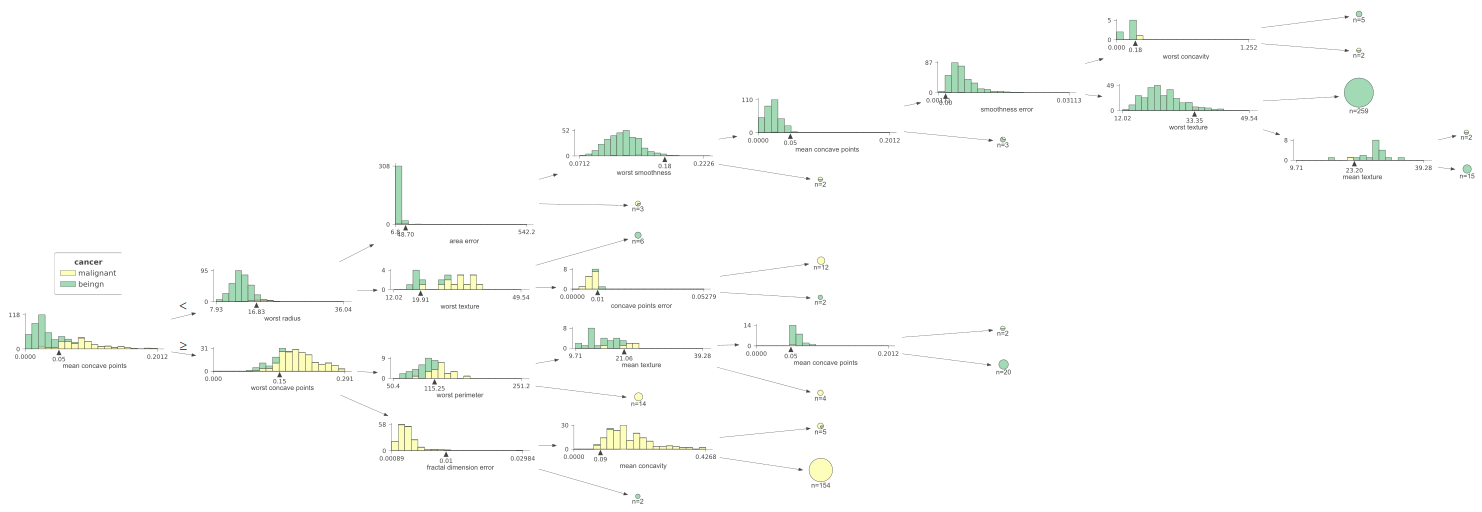

In [34]:
viz = dtreeviz(clf, 
               X,
               Y,
               target_name='cancer',
               feature_names=cancer.feature_names, 
               class_names=["malignant", "beingn"],
               orientation='LR')
viz